# Transversity-Boer-Mulders Analysis

In [1]:
import sys
import os;os.chdir('../')
import itertools as it
import numpy as np
import pandas as pd
import pylab as py
from  matplotlib import rc
from matplotlib.colors import LogNorm
%matplotlib inline
from tools.tools import save,load,lprint,load_config
from tools.bar import BAR
from fitlab.resman import RESMAN
from fitlab.parman import PARMAN
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text',usetex=True)

In [4]:
conf=load_config('inputs/transversity-boermulders2.py')
conf['resman']=RESMAN(conf)
conf['resman'].get_residuals(conf['parman'].par);

loading sidis data sets 3027

## Data vs Theory

In [5]:
co=pd.concat([pd.DataFrame(conf['resman'].sidisres.tabs[idx]) \
              for idx in conf['resman'].sidisres.tabs.keys() if idx<5000])
bm=pd.concat([pd.DataFrame(conf['resman'].sidisres.tabs[idx]) \
              for idx in conf['resman'].sidisres.tabs.keys() if idx>=5000])

In [6]:
co[:5]

,N,Q2,Shift,W,alpha,col,dependence,error_u,hadron,obs,...,target,thy,value,x,xmax,xmin,y,z,zmax,zmin
0,1.0,1.99,0.0,NaN,0.0079,compass,x,0.0079,pi+,AUTcollins,...,deuteron,0.001973,-0.0007,0.02556,0.032,0.020,0.26,0.37,NaN,NaN
1,1.0,2.79,0.0,NaN,0.0088,compass,x,0.0088,pi+,AUTcollins,...,deuteron,0.003287,0.0131,0.03967,0.050,0.032,0.23,0.39,NaN,NaN
2,1.0,4.54,0.0,NaN,0.0111,compass,x,0.0111,pi+,AUTcollins,...,deuteron,0.005797,0.0085,0.06255,0.080,0.050,0.24,0.38,NaN,NaN
3,1.0,7.40,0.0,NaN,0.0146,compass,x,0.0146,pi+,AUTcollins,...,deuteron,0.008981,0.0018,0.10050,0.130,0.080,0.25,0.37,NaN,NaN
4,1.0,11.80,0.0,NaN,0.0218,compass,x,0.0218,pi+,AUTcollins,...,deuteron,0.013173,0.0214,0.16090,0.210,0.130,0.24,0.37,NaN,NaN


In [7]:
#co.query('dependence=="%s" and target=="%s" and hadron=="%s and col==%s"'%())
co.query('dependence=="%s" and target=="%s" and hadron=="%s" and col=="%s"'%('pt','proton','pi+',"HERMES"))

,N,Q2,Shift,W,alpha,col,dependence,error_u,hadron,obs,...,target,thy,value,x,xmax,xmin,y,z,zmax,zmin
0,1.0,2.530,0.0,NaN,0.009035,HERMES,pt,NaN,pi+,AUTcollins,...,proton,0.011037,0.0185,0.106,NaN,NaN,0.490,0.350,NaN,NaN
1,1.0,2.486,0.0,NaN,0.008773,HERMES,pt,NaN,pi+,AUTcollins,...,proton,0.013454,0.0132,0.100,NaN,NaN,0.519,0.355,NaN,NaN
2,1.0,2.415,0.0,NaN,0.008078,HERMES,pt,NaN,pi+,AUTcollins,...,proton,0.014614,0.0100,0.093,NaN,NaN,0.549,0.355,NaN,NaN
3,1.0,2.342,0.0,NaN,0.005924,HERMES,pt,NaN,pi+,AUTcollins,...,proton,0.015851,0.0107,0.086,NaN,NaN,0.580,0.360,NaN,NaN
4,1.0,2.303,0.0,NaN,0.007004,HERMES,pt,NaN,pi+,AUTcollins,...,proton,0.018501,0.0142,0.080,NaN,NaN,0.616,0.388,NaN,NaN


## Collins asymmetry 

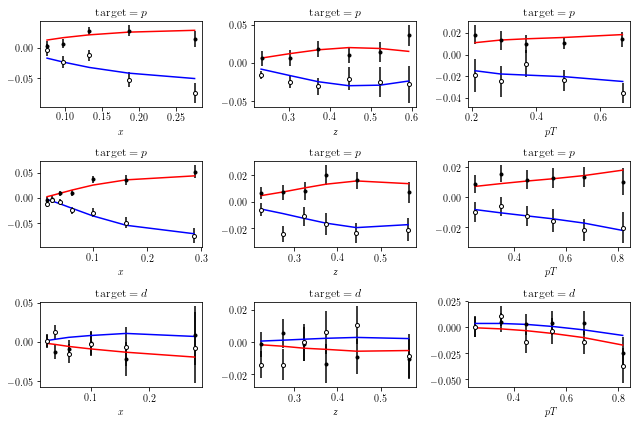

In [8]:
def plot(ax,axis,col,tar):
    if axis=='pT':
        data_pip=co.query('dependence=="%s" and target=="%s" and hadron=="%s" and col=="%s" '%(axis,tar,'pi+',col))
        data_pim=co.query('dependence=="%s" and target=="%s" and hadron=="%s" and col=="%s" '%(axis,tar,'pi-',col))
        if len(data_pip.value)==0:
            data_pip=co.query('dependence=="pt" and target=="%s" and hadron=="%s" and col=="%s" '%(tar,'pi+',col))
            data_pim=co.query('dependence=="pt" and target=="%s" and hadron=="%s" and col=="%s" '%(tar,'pi-',col))
    else:
        data_pip=co.query('dependence=="%s" and target=="%s" and hadron=="%s" and col=="%s" '%(axis,tar,'pi+',col))
        data_pim=co.query('dependence=="%s" and target=="%s" and hadron=="%s" and col=="%s" '%(axis,tar,'pi-',col))
    
    sign=1
    if col=='compass': sign=-1
    ax.errorbar(data_pip[axis],sign*data_pip['value'],yerr=data_pip['alpha'],fmt='k.')
    ax.errorbar(data_pim[axis],sign*data_pim['value'],yerr=data_pim['alpha'],fmt='ko', mfc='white',markersize=4)

    ax.plot(data_pip[axis],sign*data_pip['thy'],'r-')
    ax.plot(data_pim[axis],sign*data_pim['thy'],'b-')

    if tar=='proton': star='p'
    if tar=='deuteron': star='d'
 
    ax.set_title(r'${\rm target}=%s$'%(star))
    ax.set_xlabel(r'$%s$'%axis)
    #if axis=='x': ax.set_ylim(-0.05,0.05)

nrows,ncols=3,3
py.figure(figsize=(ncols*3,nrows*2))

cnt=0
for col in ['HERMES','compass']:
    if col=='HERMES': targets=['proton']
    if col=='compass': targets=['proton','deuteron']   
    for tar in targets:
        for axis  in ['x','z','pT']:
            cnt+=1
            ax=py.subplot(nrows,ncols,cnt)
            plot(ax,axis,col,tar)
py.tight_layout()

## Boer-Mulders asymmetry

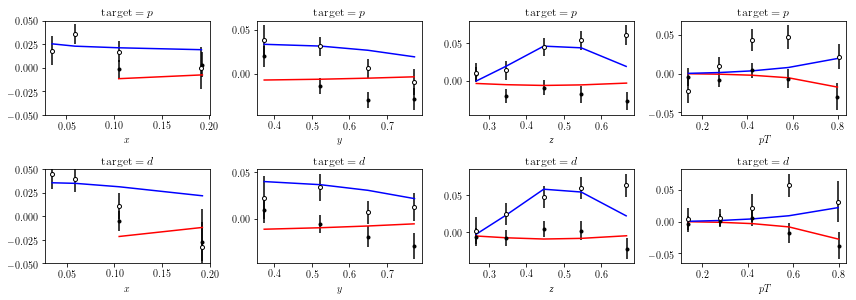

In [9]:
def plot(ax,axis,tar):
    data_pip=bm.query('axis=="%s" and target=="%s" and hadron=="%s" '%(axis,tar,'pi+'))
    data_pim=bm.query('axis=="%s" and target=="%s" and hadron=="%s" '%(axis,tar,'pi-'))
    if axis=='pt': axis='pT'
    ax.errorbar(data_pip[axis],data_pip['value'],yerr=data_pip['alpha'],fmt='k.')
    ax.errorbar(data_pim[axis],data_pim['value'],yerr=data_pim['alpha'],fmt='ko', mfc='white',markersize=4)

    ax.plot(data_pip[axis],data_pip['thy'],'r-')
    ax.plot(data_pim[axis],data_pim['thy'],'b-')

    if tar=='proton': star='p'
    if tar=='deuteron': star='d'
 
    ax.set_title(r'${\rm target}=%s$'%(star))
    ax.set_xlabel(r'$%s$'%axis)
    if axis=='x': ax.set_ylim(-0.05,0.05)

nrows,ncols=4,4
py.figure(figsize=(ncols*3,nrows*2))

cnt=0
for tar in ['proton','deuteron']:
    for axis  in ['x','y','z','pt']:
        cnt+=1
        ax=py.subplot(nrows,ncols,cnt)
        plot(ax,axis,tar)
py.tight_layout()

## Transversity

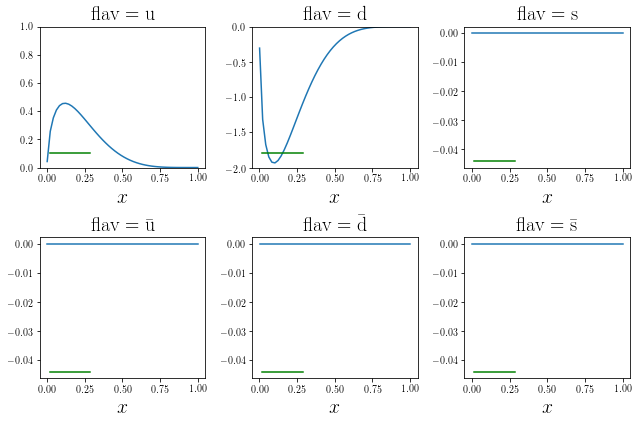

In [10]:
def plot(ax,iflav):
    X=np.linspace(1e-3,1)
    Q2=1
    XF=[conf['transversity'].get_C(x,Q2,target='p')[iflav] for x in X]
    ax.plot(X,XF)
    if iflav==1: 
        ax.set_title(r'${\rm flav=u}$',size=20)
        ax.set_ylim(0,1)
    if iflav==3: 
        ax.set_title(r'${\rm flav=d}$',size=20)
        ax.set_ylim(-2,0)
    if iflav==5: ax.set_title(r'${\rm flav=s}$',size=20)
    if iflav==2: ax.set_title(r'${\rm flav=\bar{u}}$',size=20)
    if iflav==4: ax.set_title(r'${\rm flav=\bar{d}}$',size=20)
    if iflav==6: ax.set_title(r'${\rm flav=\bar{s}}$',size=20)
    ax.set_xlabel(r'$x$',size=20)
    xmin=np.amin(co.x.values)
    xmax=np.amax(co.x.values)
    ymin,ymax=ax.get_ylim()
    dy=ymax-ymin
    ax.plot([xmin,xmax],[ymin+dy*0.1,ymin+dy*0.1],'g-')
    #ax.set_ylim(ymin,ymax)
    
nrows,ncols=2,3
py.figure(figsize=(ncols*3,nrows*3))
cnt=0
for iflav in [1,3,5,2,4,6]:
    cnt+=1
    ax=py.subplot(nrows,ncols,cnt)
    plot(ax,iflav)
py.tight_layout()

## Boer-Mulders

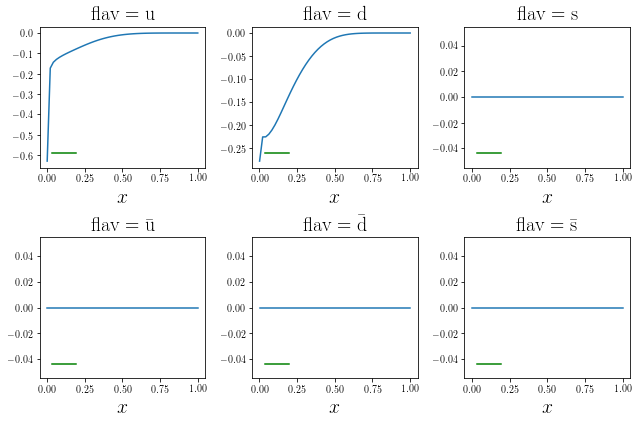

In [11]:
def plot(ax,iflav):
    X=np.linspace(1e-3,1)
    Q2=1
    XF=[x*conf['boermulders'].get_C(x,Q2,target='p')[iflav] for x in X]
    ax.plot(X,XF)
    if iflav==1: ax.set_title(r'${\rm flav=u}$',size=20)
    if iflav==3: ax.set_title(r'${\rm flav=d}$',size=20)
    if iflav==5: ax.set_title(r'${\rm flav=s}$',size=20)
    if iflav==2: ax.set_title(r'${\rm flav=\bar{u}}$',size=20)
    if iflav==4: ax.set_title(r'${\rm flav=\bar{d}}$',size=20)
    if iflav==6: ax.set_title(r'${\rm flav=\bar{s}}$',size=20)
    ax.set_xlabel(r'$x$',size=20)
    xmin=np.amin(bm.x.values)
    xmax=np.amax(bm.x.values)
    ymin,ymax=ax.get_ylim()
    dy=ymax-ymin
    ax.plot([xmin,xmax],[ymin+dy*0.1,ymin+dy*0.1],'g-')
    ax.set_ylim(ymin,ymax)
    
nrows,ncols=2,3
py.figure(figsize=(ncols*3,nrows*3))
cnt=0
for iflav in [1,3,5,2,4,6]:
    cnt+=1
    ax=py.subplot(nrows,ncols,cnt)
    plot(ax,iflav)
py.tight_layout()

## Collins

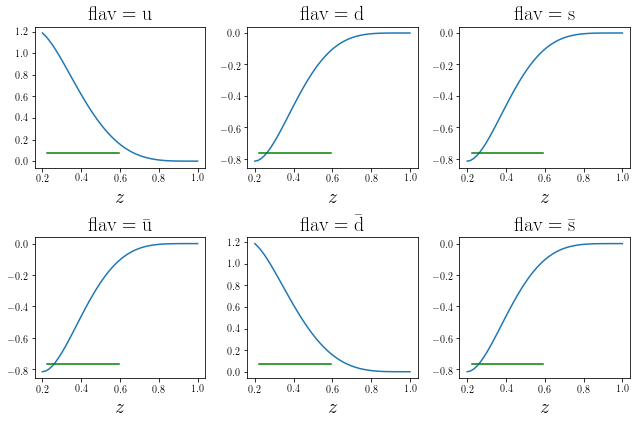

In [12]:
def plot(ax,iflav):
    Z=np.linspace(0.2,1)
    Q2=1
    ZF=[conf['collins'].get_C(z,Q2,hadron='pi+')[iflav] for z in Z]
    ax.plot(Z,ZF)
    if iflav==1: ax.set_title(r'${\rm flav=u}$',size=20)
    if iflav==3: ax.set_title(r'${\rm flav=d}$',size=20)
    if iflav==5: ax.set_title(r'${\rm flav=s}$',size=20)
    if iflav==2: ax.set_title(r'${\rm flav=\bar{u}}$',size=20)
    if iflav==4: ax.set_title(r'${\rm flav=\bar{d}}$',size=20)
    if iflav==6: ax.set_title(r'${\rm flav=\bar{s}}$',size=20)
    ax.set_xlabel(r'$z$',size=20)
    zmin=np.amin(co.z.values)
    zmax=np.amax(co.z.values)
    ymin,ymax=ax.get_ylim()
    dy=ymax-ymin
    ax.plot([zmin,zmax],[ymin+dy*0.1,ymin+dy*0.1],'g-')
    ax.set_ylim(ymin,ymax)
    
nrows,ncols=2,3
py.figure(figsize=(ncols*3,nrows*3))
cnt=0
for iflav in [1,3,5,2,4,6]:
    cnt+=1
    ax=py.subplot(nrows,ncols,cnt)
    plot(ax,iflav)
py.tight_layout()